In [15]:
import h5py
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import numpy as np

In [16]:
directory = "./Data/event_record_top_lep_incl_CMS_jetR05_selected10M_BarcodeFixed"
jet_features_mass = []

for filename in tqdm(os.listdir(directory)):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        with h5py.File(f, "r") as h5py_file:
            break

  0%|          | 0/8400 [00:00<?, ?it/s]


In [34]:
filename = "./Data/event_record_top_lep_incl_CMS_jetR05_selected10M_BarcodeFixed/event_record_top_lep_incl_CMS_jetR05_100_1.h5"
cutflow = {}
f = h5py.File(filename, 'r')
tot = [True] * len(f['lepton_features/pid'][:])
cutflow['beginning'] = np.count_nonzero(tot)

"""
The event must contain exactly one reconstructed charged lepton, with ET > 25 GeV for electrons and pT > 25 GeV for muons
"""
def lepton_selection(tot): 
    electron_passed = np.logical_and(f['lepton_features/pid'][:] == 11, np.sqrt(f['lepton_features/mass'][:]**2+f['lepton_features/pt'][:]**2) > 25**2)
    muon_passed = np.logical_and(f['lepton_features/pid'][:] == 13, f['lepton_features/pt'][:] > 25)
    passed = np.logical_or(electron_passed, muon_passed)
    tot = np.logical_and(tot, passed)
    return tot

"""
In the tt¯ → muon + jets channel, MET > 20 GeV and MET + mTW > 60 GeV.
In the tt¯ → electron + jets channel, MET > 30 GeV and mTW > 30 GeV.
"""
def sec_selection(tot):
    electron_passed = np.logical_and(f['lepton_features/pid'][:] == 11, np.sqrt(f['lepton_features/mass'][:]**2+f['lepton_features/pt'][:]**2) > 25**2)
    muon_passed = np.logical_and(f['lepton_features/pid'][:] == 13, f['lepton_features/pt'][:] > 25)
    passed = np.logical_or(electron_passed, muon_passed)
    tot = np.logical_and(tot, passed)
    return tot



tot = lepton_selection(tot)
cutflow['lepton_selection_passed'] = np.count_nonzero(tot)
tot = lepton_selection(tot)
cutflow['sec_selection_passed'] = np.count_nonzero(tot)


In [35]:
cutflow

{'beginning': 1382, 'lepton_selection_passed': 771}

(array([402., 459., 293., 136.,   0.,  62.,  21.,   4.,   3.,   2.]),
 array([ 4. ,  4.8,  5.6,  6.4,  7.2,  8. ,  8.8,  9.6, 10.4, 11.2, 12. ]),
 <BarContainer object of 10 artists>)

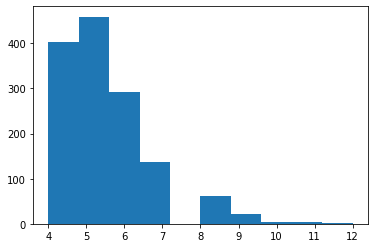

In [37]:
plt.hist(f['jet_features/num_of_jets'][:])